This script reads the Nc file for Surface Runoff downloaded from Casper log-in

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)
# To plot pretty figures
%matplotlib inline
#%matplotlib notebook

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# Where to save the figures
PROJECT_ROOT_DIR = "."  

path2Create = r'C:/rezaul/1.academic/1.research/2.project/mrb/output/'
 
if not os.path.exists(path2Create):
    os.makedirs(path2Create)    
    
path2Save = 'C:/rezaul/1.academic/1.research/2.project/mrb/output/fig/disch/'

if not os.path.exists(path2Save):
    os.makedirs(path2Save)    

IMAGES_PATH = os.path.join(path2Save)
outputPath = os.path.join(path2Save)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


## Import Libraries

In [2]:
# Common imports
import numpy as np
import pandas as pd
import os
import glob
from datetime import datetime
#from osgeo import gdal # Import the GDAL library
#import gdal

import cmocean

#import matplotlib.pyplot as plt # Import the Matplotlib package
from matplotlib import pyplot as plt  # Import the Matplotlib package
from numpy import linspace # Import the Linspace numpy library
from numpy import meshgrid # Import the Meshgrid numpy library

#from init import *
import scipy.io as sio
# Common imports
import calendar
import datetime
import matplotlib.dates as mdates
from numpy import array, ma
#import scipy.io
from scipy.io import loadmat   # https://scipy-cookbook.readthedocs.io/items/Reading_mat_files.html
import xarray as xr


In [3]:
# Stats
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import gamma, norm
from scipy.signal import detrend

from netCDF4 import Dataset   # http://code.google.com/p/netcdf4-python/
from numpy.random import normal
from numpy import hstack

import math


In [4]:
# Plotting
import matplotlib.colors as colors
from copy import copy
import matplotlib.cm as cm
#from matplotlib_scalebar.scalebar import ScaleBar

import seaborn as sns
import matplotlib.gridspec as gridspec


In [5]:
# Projection
import cartopy.crs as ccrs

import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
from descartes import PolygonPatch
import shapefile as shp  # Requires the pyshp package

#from cartopy.feature import ShapelyFeature
#from cartopy.io.shapereader import Reader

In [6]:
from descartes import PolygonPatch
import shapefile as shp  # Requires the pyshp package
sf=shp.Reader('C:/rezaul/1.academic/1.research/1.data/shapeFile/missi/Miss_RiverBasin.shp')

## Basin shape files

In [7]:
shapeFile_Missi = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/shapeFile/mississippi_basins/mississippi_basins/mississippi_1.shp'
shapeFile_Arkansas = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/shapeFile/mississippi_basins/mississippi_basins/arkansas_basin_1.shp'
shapeFile_Missouri = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/shapeFile/mississippi_basins/mississippi_basins/missouri_basin_1.shp'
shapeFile_Ohio = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/shapeFile/mississippi_basins/mississippi_basins/ohio_basin_1.shp'

In [8]:
sf_Missi = shp.Reader(shapeFile_Missi)
sf_Arkansas = shp.Reader(shapeFile_Arkansas)
sf_Missouri = shp.Reader(shapeFile_Missouri)
sf_Ohio = shp.Reader(shapeFile_Ohio)


In [9]:
reader_Missi = shpreader.Reader(shapeFile_Missi)
basin_Missi = list(reader_Missi.geometries())
#

reader_Arkansas = shpreader.Reader(shapeFile_Arkansas)
basin_Arkansas = list(reader_Arkansas.geometries())
#
reader_Missouri = shpreader.Reader(shapeFile_Missouri)
basin_Missouri = list(reader_Missouri.geometries())
#
reader_Ohio = shpreader.Reader(shapeFile_Ohio)
basin_Ohio = list(reader_Ohio.geometries())
#


## Read Nc file

In [10]:
filePath = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/precip/mon'
fileName = 'b.e21.BHISTcmip6.f09_g17.LE2-1001.001.cam.h0.PRECT.185001-185912.nc'
ncFile_param = str(filePath) + '/' + str(fileName)
print(ncFile_param)

C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/precip/mon/b.e21.BHISTcmip6.f09_g17.LE2-1001.001.cam.h0.PRECT.185001-185912.nc


In [11]:
file_param = Dataset(ncFile_param, mode='r')
file_param

lons = file_param.variables['lon'][:]
lats = file_param.variables['lat'][:]

In [12]:
print(lats[0:4])
print(lons[0:4])

[-90.         -89.05759162 -88.11518325 -87.17277487]
[0.   1.25 2.5  3.75]


In [13]:
file_xr  = xr.open_dataset(ncFile_param) 
file_xr

C:\Users\muham\anaconda3\lib\site-packages\xarray\backends\plugins.py:61: RuntimeWarning: Engine 'rasterio' loading failed:
DLL load failed while importing _base: The specified procedure could not be found.
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


<xarray.Dataset>
Dimensions:       (lat: 192, zlon: 1, nbnd: 2, lon: 288, lev: 32, ilev: 33,
                   time: 120)
Coordinates:
  * lat           (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * zlon          (zlon) float64 0.0
  * lon           (lon) float64 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
  * lev           (lev) float64 3.643 7.595 14.36 24.61 ... 957.5 976.3 992.6
  * ilev          (ilev) float64 2.255 5.032 10.16 18.56 ... 967.5 985.1 1e+03
  * time          (time) object 1850-02-01 00:00:00 ... 1860-01-01 00:00:00
Dimensions without coordinates: nbnd
Data variables: (12/27)
    zlon_bnds     (zlon, nbnd) float64 ...
    gw            (lat) float64 ...
    hyam          (lev) float64 ...
    hybm          (lev) float64 ...
    P0            float64 ...
    hyai          (ilev) float64 ...
    ...            ...
    n2ovmr        (time) float64 ...
    f11vmr        (time) float64 ...
    f12vmr        (time) float64 ...
    sol_tsi       (time) float64 ...
    nsteph        (time) float64 ...
    PRECT         (time, lat, lon) float32 ...
Attributes:
    Conventions:       CF-1.0
    source:            CAM
    case:              b.e21.BHISTcmip6.f09_g17.LE2-1001.001
    logname:           sunseon
    host:              mom1
    initial_file:      b.e21.B1850.f09_g17.CMIP6-piControl.001.cam.i.1001-01-...
    topography_file:   /mnt/lustre/share/CESM/cesm_input/atm/cam/topo/fv_0.9x...
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    time_period_freq:  month_1

In [14]:
param_val = file_xr['PRECT']
print(param_val.shape)
print(param_val)

(120, 192, 288)
<xarray.DataArray 'PRECT' (time: 120, lat: 192, lon: 288)>
[6635520 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time     (time) object 1850-02-01 00:00:00 ... 1860-01-01 00:00:00
Attributes:
    units:         m/s
    long_name:     Total (convective and large-scale) precipitation rate (liq...
    cell_methods:  time: mean


In [15]:

file_paramHist = Dataset(ncFile_param, mode='r')
file_paramHist

lons = file_paramHist.variables['lon'][:]
lats = file_paramHist.variables['lat'][:]
times = file_paramHist.variables['time'][:]
ntim = times.shape[0]
print(ntim)

time = np.arange(ntim)
time

param_valHist = file_paramHist.variables['PRECT'][:]*86400*30
print(param_valHist.shape)
   

120
(120, 192, 288)


## Setting US boundaries

In [16]:
# Save only U.S. 
latboundsUs = [ 25 , 55]
lonboundsUs = [230 , 300]


In [17]:
# latitude lower and upper index
latli = np.argmin( np.abs( lats - latboundsUs[0] ) )
latui = np.argmin( np.abs( lats - latboundsUs[1] ) ) 

# longitude lower and upper index
lonli = np.argmin( np.abs( lons - lonboundsUs[0] ) )
lonui = np.argmin( np.abs( lons - lonboundsUs[1] ) )  

In [18]:
print(latli, latui)


122 154


In [19]:
print(lonli, lonui)

184 240


In [20]:
param_val_sample_Us = param_val[:, latli:latui , lonli:lonui]
print(param_val_sample_Us.shape)

(120, 32, 56)


In [21]:
lats_Us = lats[latli:latui]
print(lats_Us)

[24.97382199 25.91623037 26.85863874 27.80104712 28.7434555  29.68586387
 30.62827225 31.57068063 32.51308901 33.45549738 34.39790576 35.34031414
 36.28272251 37.22513089 38.16753927 39.10994764 40.05235602 40.9947644
 41.93717277 42.87958115 43.82198953 44.76439791 45.70680628 46.64921466
 47.59162304 48.53403141 49.47643979 50.41884817 51.36125654 52.30366492
 53.2460733  54.18848168]


In [22]:
lons_Us = lons[lonli:lonui]
print(lons_Us)

[230.   231.25 232.5  233.75 235.   236.25 237.5  238.75 240.   241.25
 242.5  243.75 245.   246.25 247.5  248.75 250.   251.25 252.5  253.75
 255.   256.25 257.5  258.75 260.   261.25 262.5  263.75 265.   266.25
 267.5  268.75 270.   271.25 272.5  273.75 275.   276.25 277.5  278.75
 280.   281.25 282.5  283.75 285.   286.25 287.5  288.75 290.   291.25
 292.5  293.75 295.   296.25 297.5  298.75]


## Using data processed from GLADE access to NCAR HPC

### Lat Lon info from CESM2

In [23]:
file_LatUs = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/CESM2_FLOOD/sm/latsUsArr.npy'
latUs_cesm2 = np.load(file_LatUs)
print(latUs_cesm2.shape)
print(latUs_cesm2)

(32,)
[24.973822 25.916231 26.858639 27.801046 28.743456 29.685863 30.628273
 31.57068  32.51309  33.455498 34.397907 35.340313 36.282722 37.225132
 38.167538 39.109947 40.052357 40.994766 41.937172 42.87958  43.82199
 44.764397 45.706806 46.649216 47.59162  48.53403  49.47644  50.41885
 51.361256 52.303665 53.246075 54.18848 ]


In [24]:
file_LonUs = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/CESM2_FLOOD/sm/lonsUsArr.npy'
lonUs_cesm2 = np.load(file_LonUs)
print(lonUs_cesm2.shape)
print(lonUs_cesm2)

(56,)
[230.   231.25 232.5  233.75 235.   236.25 237.5  238.75 240.   241.25
 242.5  243.75 245.   246.25 247.5  248.75 250.   251.25 252.5  253.75
 255.   256.25 257.5  258.75 260.   261.25 262.5  263.75 265.   266.25
 267.5  268.75 270.   271.25 272.5  273.75 275.   276.25 277.5  278.75
 280.   281.25 282.5  283.75 285.   286.25 287.5  288.75 290.   291.25
 292.5  293.75 295.   296.25 297.5  298.75]


### Historical (1930-2014)

In [25]:
file_hist_ensMems = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/precip/mon/monPrecipUsHistEnsMems.npy'
file_hist_ensMems_loaded = np.load(file_hist_ensMems)
print(file_hist_ensMems_loaded.shape)
maxVal = np.nanmax(file_hist_ensMems_loaded)
maxVal

(1980, 32, 56, 50)


1416.2439802021254

### Scenario (2015-2100)

In [26]:
file_scen_ensMems = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/precip/mon/monPrecipUsScenEnsMems.npy'

file_scen_ensMems_loaded = np.load(file_scen_ensMems)
print(file_scen_ensMems_loaded.shape)
maxVal = np.nanmax(file_scen_ensMems_loaded)
maxVal

(1032, 32, 56, 50)


1645.1687024527928

## The two files

In [27]:
print(file_hist_ensMems_loaded.shape)
print(file_scen_ensMems_loaded.shape)


(1980, 32, 56, 50)
(1032, 32, 56, 50)


In [28]:
file_hist_ensMean_loaded = np.nanmean(file_hist_ensMems_loaded, axis = 3)
file_scen_ensMean_loaded = np.nanmean(file_scen_ensMems_loaded, axis = 3)

In [29]:
print(file_hist_ensMean_loaded.shape)
print(file_scen_ensMean_loaded.shape)


(1980, 32, 56)
(1032, 32, 56)


## The four time slots

In [30]:

histYrSt = 1850

refPeriodYrSt = 1971
refPeriodYrEnd = 2000
#++++++++++++++++++++++++

scenYrSt = 2015
scenEraOneYrEnd = 2044

scenEraTwoYrSt = 2045
scenEraTwoYrEnd = 2074

scenEraThreeYrSt = 2075
scenYrEnd = 2100
#


## tsteps

In [31]:
nMonsPerYr = 12     # 
print(nMonsPerYr)

12


## Reference Period

In [32]:
refPeriodStepSt = (refPeriodYrSt - histYrSt)*nMonsPerYr
refPeriodStepEnd = (refPeriodYrEnd - histYrSt + 1)*nMonsPerYr
print(refPeriodStepSt, refPeriodStepEnd)
print(refPeriodStepEnd-refPeriodStepSt)

1452 1812
360


## Era 1

In [33]:
scenEraOneStepSt = 0
scenEraOneStepEnd = (scenEraOneYrEnd - scenYrSt + 1)*nMonsPerYr
print(scenEraOneStepSt, scenEraOneStepEnd)
print(scenEraOneStepEnd-scenEraOneStepSt)

0 360
360


## Era 2

In [34]:
scenEraTwoStepSt = (scenEraTwoYrSt - scenYrSt)*nMonsPerYr
scenEraTwoStepEnd = (scenEraTwoYrEnd - scenYrSt + 1)*nMonsPerYr
print(scenEraTwoStepSt, scenEraTwoStepEnd)
print(scenEraTwoStepEnd-scenEraTwoStepSt)

360 720
360


## Era 3

In [35]:
scenEraThreeStepSt = (scenEraThreeYrSt - scenYrSt)*nMonsPerYr
scenEraThreeStepEnd = (scenYrEnd - scenYrSt + 1)*nMonsPerYr
print(scenEraThreeStepSt, scenEraThreeStepEnd)
print(scenEraThreeStepEnd-scenEraThreeStepSt)

720 1032
312


## Subsetting the data into different periods / Eras

In [36]:
print(file_hist_ensMean_loaded.shape)
print(file_scen_ensMean_loaded.shape)

(1980, 32, 56)
(1032, 32, 56)


In [37]:
param_refPeriod_Us_ensmean = file_hist_ensMean_loaded[refPeriodStepSt:refPeriodStepEnd, :]
print(param_refPeriod_Us_ensmean.shape)

(360, 32, 56)


In [38]:
param_scenEraOne_Us_ensmean = file_scen_ensMean_loaded[scenEraOneStepSt:scenEraOneStepEnd, :]
print(param_scenEraOne_Us_ensmean.shape)

(360, 32, 56)


In [39]:
param_scenEraTwo_Us_ensmean = file_scen_ensMean_loaded[scenEraTwoStepSt:scenEraTwoStepEnd, :]
print(param_scenEraTwo_Us_ensmean.shape)

(360, 32, 56)


In [40]:
param_scenEraThree_Us_ensmean = file_scen_ensMean_loaded[scenEraThreeStepSt:scenEraThreeStepEnd, :]
print(param_scenEraThree_Us_ensmean.shape)

(312, 32, 56)


## Time average value at the reference period and at the three Eras

In [41]:
param_refPeriod_Us_ensmean_timeAvg = np.nanmean(param_refPeriod_Us_ensmean, axis=0)
print(param_refPeriod_Us_ensmean_timeAvg.shape)

(32, 56)


In [42]:
param_scenEraOne_Us_ensmean_timeAvg = np.nanmean(param_scenEraOne_Us_ensmean, axis=0)
print(param_scenEraOne_Us_ensmean_timeAvg.shape)

(32, 56)


In [43]:
param_scenEraTwo_Us_ensmean_timeAvg = np.nanmean(param_scenEraTwo_Us_ensmean, axis=0)
print(param_scenEraTwo_Us_ensmean_timeAvg.shape)

(32, 56)


In [44]:
param_scenEraThree_Us_ensmean_timeAvg = np.nanmean(param_scenEraThree_Us_ensmean, axis=0)
print(param_scenEraThree_Us_ensmean_timeAvg.shape)

(32, 56)


## Differences of Precipitation at the three Eras relative to the refernce period mean

In [45]:
print(param_refPeriod_Us_ensmean_timeAvg.shape)
print(param_scenEraOne_Us_ensmean_timeAvg.shape)
print(param_scenEraTwo_Us_ensmean_timeAvg.shape)
print(param_scenEraThree_Us_ensmean_timeAvg.shape)


(32, 56)
(32, 56)
(32, 56)
(32, 56)


In [46]:
param_scenEraOne_diff_Us_ensmean_timeAvg = (param_scenEraOne_Us_ensmean_timeAvg - param_refPeriod_Us_ensmean_timeAvg)
print(param_scenEraOne_diff_Us_ensmean_timeAvg.shape)

param_scenEraTwo_diff_Us_ensmean_timeAvg = (param_scenEraTwo_Us_ensmean_timeAvg - param_refPeriod_Us_ensmean_timeAvg)
print(param_scenEraTwo_diff_Us_ensmean_timeAvg.shape)

param_scenEraThree_diff_Us_ensmean_timeAvg = (param_scenEraThree_Us_ensmean_timeAvg - param_refPeriod_Us_ensmean_timeAvg)
print(param_scenEraThree_diff_Us_ensmean_timeAvg.shape)



(32, 56)
(32, 56)
(32, 56)


## Writing in an Xarray Data array

In [47]:
y_Us, x_Us = param_scenEraOne_diff_Us_ensmean_timeAvg.shape
print(y_Us)
print(x_Us)

32
56


In [48]:
param_scenEraOne_diff_Us_xarray = xr.DataArray(param_scenEraOne_diff_Us_ensmean_timeAvg, coords=[latUs_cesm2, lonUs_cesm2 ], dims=["Lat","Lon"])

print(param_scenEraOne_diff_Us_xarray.shape)
print(param_scenEraOne_diff_Us_xarray)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[-0.58837701, -0.39874556, -0.32652769, ...,  0.91091265,
         0.66223786,  0.29843128],
       [-0.59684059, -0.41044162, -0.24715516, ...,  1.45909638,
         1.32703012,  1.13672896],
       [-0.72468071, -0.51727308, -0.30913081, ...,  2.06978758,
         1.944079  ,  1.80885732],
       ...,
       [ 2.94244802,  3.29396453,  0.64677028, ...,  4.63648885,
         4.71327117,  4.72934506],
       [ 3.13226449,  1.28783264,  0.71764429, ...,  4.93825177,
         4.79610941,  4.54157176],
       [ 2.12178381,  1.19058984,  1.3053737 , ...,  4.97864564,
         4.57574413,  3.90556634]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [49]:
param_scenEraTwo_diff_Us_xarray = xr.DataArray(param_scenEraTwo_diff_Us_ensmean_timeAvg, coords=[latUs_cesm2, lonUs_cesm2 ], dims=["Lat","Lon"])

print(param_scenEraTwo_diff_Us_xarray.shape)
print(param_scenEraTwo_diff_Us_xarray)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[-0.4267514 , -0.35157167, -0.30272308, ...,  1.68596563,
         0.95355654, -0.08805744],
       [-0.25545582, -0.17746797, -0.09991694, ...,  3.36663559,
         2.72075732,  1.82892985],
       [-0.0777135 , -0.01784704,  0.06270102, ...,  4.90526746,
         4.14873737,  3.40494744],
       ...,
       [10.51256402, 11.08875868,  5.41566476, ...,  7.83459521,
         8.04256256,  8.19337382],
       [11.76805786,  7.6640741 ,  4.84968925, ...,  7.71840456,
         7.69407721,  7.72622633],
       [ 8.66497128,  6.08274327,  5.00584121, ...,  7.30951067,
         6.73901484,  6.1786158 ]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [50]:
param_scenEraThree_diff_Us_xarray = xr.DataArray(param_scenEraThree_diff_Us_ensmean_timeAvg, coords=[latUs_cesm2, lonUs_cesm2 ], dims=["Lat","Lon"])

print(param_scenEraThree_diff_Us_xarray.shape)
print(param_scenEraThree_diff_Us_xarray)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[ 0.47402534,  0.27230859,  0.0692417 , ...,  2.52960878,
         1.26305461, -0.23185024],
       [ 0.80316176,  0.71531359,  0.57780094, ...,  5.53084325,
         4.41497383,  3.13205294],
       [ 1.16002157,  1.11540173,  1.05101034, ...,  8.00146461,
         7.04175952,  6.09077061],
       ...,
       [18.07987902, 18.96075658,  9.26749034, ..., 13.3144104 ,
        13.75510944, 14.0114068 ],
       [20.10782502, 13.94756362,  8.34969076, ..., 12.54967645,
        12.8382115 , 13.04148778],
       [15.00029742, 10.5492239 ,  8.66942705, ..., 11.56829182,
        11.04185413, 10.68607574]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


## Masking files for the Basin Domain only

### Mississippi

In [51]:
MaskFile_Missi_to_load = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/shapeFile/mask/mrb_us/mask_missiWri_us_CESM_longThree.nc'
print(MaskFile_Missi_to_load)

C:/rezaul/1.academic/1.research/2.project/mrb/dt/shapeFile/mask/mrb_us/mask_missiWri_us_CESM_longThree.nc


In [52]:
MaskFile_Missi = xr.open_dataset(MaskFile_Missi_to_load)['Mask']
print(MaskFile_Missi)

<xarray.DataArray 'Mask' (Lat: 32, Lon: 56)>
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [53]:
param_scenEraOne_diff_masked_Missi = param_scenEraOne_diff_Us_xarray.where(MaskFile_Missi>0)
print(param_scenEraOne_diff_masked_Missi.shape)
print(param_scenEraOne_diff_masked_Missi)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [54]:
param_scenEraTwo_diff_masked_Missi = param_scenEraTwo_diff_Us_xarray.where(MaskFile_Missi>0)
print(param_scenEraTwo_diff_masked_Missi.shape)
print(param_scenEraTwo_diff_masked_Missi)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [55]:
param_scenEraThree_diff_masked_Missi = param_scenEraThree_diff_Us_xarray.where(MaskFile_Missi>0)
print(param_scenEraThree_diff_masked_Missi.shape)
print(param_scenEraThree_diff_masked_Missi)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


## Find max and min values

In [56]:
maxVal_diff_scenEraOne = np.nanmax(param_scenEraOne_diff_masked_Missi)
print(maxVal_diff_scenEraOne)

minVal_diff_scenEraOne = np.nanmin(param_scenEraOne_diff_masked_Missi)
print(minVal_diff_scenEraOne)


5.073504423156805
0.09344309245379634


In [57]:
maxVal_diff_scenEraTwo = np.nanmax(param_scenEraTwo_diff_masked_Missi)
print(maxVal_diff_scenEraTwo)

minVal_diff_scenEraTwo = np.nanmin(param_scenEraTwo_diff_masked_Missi)
print(minVal_diff_scenEraTwo)


9.640323909652992
0.5723455293764381


In [58]:
maxVal_diff_scenEraThree = np.nanmax(param_scenEraThree_diff_masked_Missi)
print(maxVal_diff_scenEraThree)

minVal_diff_scenEraThree = np.nanmin(param_scenEraThree_diff_masked_Missi)
print(minVal_diff_scenEraThree)


14.918096066468763
1.403391487860187


## Plotting a Map of Precipitation fields

In [59]:

latUsMin = latUs_cesm2.min()     # = or = latsCfsDnSc
print(latUsMin)

latUsMax = latUs_cesm2.max()
print(latUsMax)

lonUsMin = lonUs_cesm2.min()
print(lonUsMin)

lonUsMax = lonUs_cesm2.max()
print(lonUsMax)

24.973822
54.18848
230.0
298.75


In [60]:
extentUs = [lonUsMin, lonUsMax, latUsMin, latUsMax]
print(extentUs)

[230.0, 298.75, 24.973822, 54.18848]


In [61]:
x_Us = linspace(lonUsMin, lonUsMax, x_Us)
y_Us = linspace(latUsMin, latUsMax, y_Us)
print(x_Us)
print(y_Us)

# Create the rectangular grid out of these values
xx_Us, yy_Us = meshgrid(x_Us, y_Us)


[230.   231.25 232.5  233.75 235.   236.25 237.5  238.75 240.   241.25
 242.5  243.75 245.   246.25 247.5  248.75 250.   251.25 252.5  253.75
 255.   256.25 257.5  258.75 260.   261.25 262.5  263.75 265.   266.25
 267.5  268.75 270.   271.25 272.5  273.75 275.   276.25 277.5  278.75
 280.   281.25 282.5  283.75 285.   286.25 287.5  288.75 290.   291.25
 292.5  293.75 295.   296.25 297.5  298.75]
[24.97382164 25.91622999 26.85863833 27.80104668 28.74345503 29.68586337
 30.62827172 31.57068006 32.51308841 33.45549676 34.3979051  35.34031345
 36.2827218  37.22513014 38.16753849 39.10994684 40.05235518 40.99476353
 41.93717187 42.87958022 43.82198857 44.76439691 45.70680526 46.64921361
 47.59162195 48.5340303  49.47643865 50.41884699 51.36125534 52.30366368
 53.24607203 54.18848038]


In [62]:
vmin_scenEraOne = np.floor(minVal_diff_scenEraOne)
vmax_scenEraOne = np.ceil(maxVal_diff_scenEraOne)
print(vmin_scenEraOne)
print(vmax_scenEraOne)

0.0
6.0


In [63]:

#vmin_scenEraOne = np.floor(minVal_diff_scenEraOne)
vmin_scenEraOne = 0.1

vmax_scenEraOne = np.ceil(maxVal_diff_scenEraOne)
print(vmin_scenEraOne)
print(vmax_scenEraOne)


0.1
6.0


In [64]:
vmin_scenEraTwo = np.floor(minVal_diff_scenEraTwo)
vmax_scenEraTwo = np.ceil(maxVal_diff_scenEraTwo)
print(vmin_scenEraTwo)
print(vmax_scenEraTwo)

0.0
10.0


In [65]:
vmin_scenEraThree = np.floor(minVal_diff_scenEraThree)
vmax_scenEraThree = np.ceil(maxVal_diff_scenEraThree)
print(vmin_scenEraThree)
print(vmax_scenEraThree)

1.0
15.0


In [66]:
nDiv_scenEraOne = int(vmax_scenEraOne - vmin_scenEraOne + 1)
print(nDiv_scenEraOne)

6


In [67]:
nDiv_scenEraTwo = int(vmax_scenEraTwo - vmin_scenEraTwo + 1)
print(nDiv_scenEraTwo)

11


In [68]:
nDiv_scenEraThree = int(vmax_scenEraThree - vmin_scenEraThree + 1)
print(nDiv_scenEraThree)

15


## Loading data for other parameters saved in the Disk

## ET

In [69]:
# 
file_et_scenEraOne_diff_masked_Missi = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/et/mon/output/map/mask/et_scenEraOne_diff_masked_Missi.npy'
et_scenEraOne_diff_masked_Missi = np.load(file_et_scenEraOne_diff_masked_Missi)
print(et_scenEraOne_diff_masked_Missi.shape)

file_et_scenEraTwo_diff_masked_Missi = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/et/mon/output/map/mask/et_scenEraTwo_diff_masked_Missi.npy'
et_scenEraTwo_diff_masked_Missi = np.load(file_et_scenEraTwo_diff_masked_Missi)
print(et_scenEraTwo_diff_masked_Missi.shape)

file_et_scenEraThree_diff_masked_Missi = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/et/mon/output/map/mask/et_scenEraThree_diff_masked_Missi.npy'
et_scenEraThree_diff_masked_Missi = np.load(file_et_scenEraThree_diff_masked_Missi)
print(et_scenEraThree_diff_masked_Missi.shape)


(32, 56)
(32, 56)
(32, 56)


## Snowmelt

In [70]:
# 
file_snowMelt_scenEraOne_diff_masked_Missi = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/snowMelt/mon/output/map/mask/snowMelt_scenEraOne_diff_masked_Missi.npy'
snowMelt_scenEraOne_diff_masked_Missi = np.load(file_snowMelt_scenEraOne_diff_masked_Missi)
print(snowMelt_scenEraOne_diff_masked_Missi.shape)

file_snowMelt_scenEraTwo_diff_masked_Missi = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/snowMelt/mon/output/map/mask/snowMelt_scenEraTwo_diff_masked_Missi.npy'
snowMelt_scenEraTwo_diff_masked_Missi = np.load(file_snowMelt_scenEraTwo_diff_masked_Missi)
print(snowMelt_scenEraTwo_diff_masked_Missi.shape)

file_snowMelt_scenEraThree_diff_masked_Missi = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/snowMelt/mon/output/map/mask/snowMelt_scenEraThree_diff_masked_Missi.npy'
snowMelt_scenEraThree_diff_masked_Missi = np.load(file_snowMelt_scenEraThree_diff_masked_Missi)
print(snowMelt_scenEraThree_diff_masked_Missi.shape)


(32, 56)
(32, 56)
(32, 56)


## Soil Moisture

In [71]:
# 
file_soilMoist_scenEraOne_diff_masked_Missi = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/soilMoist/mon/output/map/mask/soilMoist_scenEraOne_diff_masked_Missi.npy'
soilMoist_scenEraOne_diff_masked_Missi = np.load(file_soilMoist_scenEraOne_diff_masked_Missi)
print(soilMoist_scenEraOne_diff_masked_Missi.shape)

file_soilMoist_scenEraTwo_diff_masked_Missi = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/soilMoist/mon/output/map/mask/soilMoist_scenEraTwo_diff_masked_Missi.npy'
soilMoist_scenEraTwo_diff_masked_Missi = np.load(file_soilMoist_scenEraTwo_diff_masked_Missi)
print(soilMoist_scenEraTwo_diff_masked_Missi.shape)

file_soilMoist_scenEraThree_diff_masked_Missi = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/soilMoist/mon/output/map/mask/soilMoist_scenEraThree_diff_masked_Missi.npy'
soilMoist_scenEraThree_diff_masked_Missi = np.load(file_soilMoist_scenEraThree_diff_masked_Missi)
print(soilMoist_scenEraThree_diff_masked_Missi.shape)


(32, 56)
(32, 56)
(32, 56)


## Runoff

In [72]:
# 
file_runoff_scenEraOne_diff_masked_Missi = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/runoff/mon/output/map/mask/runoff_scenEraOne_diff_masked_Missi.npy'
runoff_scenEraOne_diff_masked_Missi = np.load(file_runoff_scenEraOne_diff_masked_Missi)
print(runoff_scenEraOne_diff_masked_Missi.shape)

file_runoff_scenEraTwo_diff_masked_Missi = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/runoff/mon/output/map/mask/runoff_scenEraTwo_diff_masked_Missi.npy'
runoff_scenEraTwo_diff_masked_Missi = np.load(file_runoff_scenEraTwo_diff_masked_Missi)
print(runoff_scenEraTwo_diff_masked_Missi.shape)

file_runoff_scenEraThree_diff_masked_Missi = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/runoff/mon/output/map/mask/runoff_scenEraThree_diff_masked_Missi.npy'
runoff_scenEraThree_diff_masked_Missi = np.load(file_runoff_scenEraThree_diff_masked_Missi)
print(runoff_scenEraThree_diff_masked_Missi.shape)


(32, 56)
(32, 56)
(32, 56)


## Making a panel plot for different parameters

### Precipitation

In [73]:
class MidpointNormalize(mpl.colors.Normalize):
    def __init__(self, vmin, vmax, midpoint=0, clip=False):
        self.midpoint = midpoint
        mpl.colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        normalized_min = max(0, 1 / 2 * (1 - abs((self.midpoint - self.vmin) / (self.midpoint - self.vmax))))
        normalized_max = min(1, 1 / 2 * (1 + abs((self.vmax - self.midpoint) / (self.midpoint - self.vmin))))
        normalized_mid = 0.5
        x, y = [self.vmin, self.midpoint, self.vmax], [normalized_min, normalized_mid, normalized_max]
        return np.ma.masked_array(np.interp(value, x, y))

In [74]:

maxVal_precip_diff_scenEraOne = np.nanmax(param_scenEraOne_diff_masked_Missi)
print(maxVal_precip_diff_scenEraOne)
minVal_precip_diff_scenEraOne = np.nanmin(param_scenEraOne_diff_masked_Missi)
print(minVal_precip_diff_scenEraOne)
maxVal_precip_diff_scenEraTwo = np.nanmax(param_scenEraTwo_diff_masked_Missi)
print(maxVal_precip_diff_scenEraTwo)
minVal_precip_diff_scenEraTwo = np.nanmin(param_scenEraTwo_diff_masked_Missi)
print(minVal_precip_diff_scenEraTwo)
maxVal_precip_diff_scenEraThree = np.nanmax(param_scenEraThree_diff_masked_Missi)
print(maxVal_precip_diff_scenEraThree)
minVal_precip_diff_scenEraThree = np.nanmin(param_scenEraThree_diff_masked_Missi)
print(minVal_precip_diff_scenEraThree)
print('')

vmin_precip_scenEraOne = np.floor(minVal_precip_diff_scenEraOne)
vmax_precip_scenEraOne = np.ceil(maxVal_precip_diff_scenEraOne)
print(vmin_precip_scenEraOne)
vmin_precip_scenEraOne = 0.1
print(vmin_precip_scenEraOne, vmax_precip_scenEraOne)

vmin_precip_scenEraTwo = np.floor(minVal_precip_diff_scenEraTwo)
vmax_precip_scenEraTwo = np.ceil(maxVal_precip_diff_scenEraTwo)
print(vmin_precip_scenEraTwo, vmax_precip_scenEraTwo)

vmin_precip_scenEraThree = np.floor(minVal_precip_diff_scenEraThree)
vmax_precip_scenEraThree = np.ceil(maxVal_precip_diff_scenEraThree)
print(vmin_precip_scenEraThree, vmax_precip_scenEraThree)
print('')

nDiv_precip_scenEraOne = int(vmax_precip_scenEraOne - vmin_precip_scenEraOne + 1)
print(nDiv_precip_scenEraOne)
nDiv_precip_scenEraTwo = int(vmax_precip_scenEraTwo - vmin_precip_scenEraTwo + 1)
print(nDiv_precip_scenEraTwo)
nDiv_precip_scenEraThree = int(vmax_precip_scenEraThree - vmin_precip_scenEraThree + 1)
print(nDiv_precip_scenEraThree)
#+++++++++++++++++++++++++++++++

fraction_precip = 0.9
norm_precip = MidpointNormalize(vmin = vmin_precip_scenEraOne, vmax = vmax_precip_scenEraThree, midpoint=0)
levels_precip = np.linspace(vmin_precip_scenEraTwo, vmax_precip_scenEraThree, int(nDiv_precip_scenEraThree/fraction_precip)) # to draw 11 levels
boundaries_precip = np.linspace(vmin_precip_scenEraTwo, vmax_precip_scenEraThree, int(nDiv_precip_scenEraThree/fraction_precip))



5.073504423156805
0.09344309245379634
9.640323909652992
0.5723455293764381
14.918096066468763
1.403391487860187

0.0
0.1 6.0
0.0 10.0
1.0 15.0

6
11
15


## ET

In [75]:
maxVal_et_diff_scenEraOne = np.nanmax(et_scenEraOne_diff_masked_Missi)
print(maxVal_et_diff_scenEraOne)
minVal_et_diff_scenEraOne = np.nanmin(et_scenEraOne_diff_masked_Missi)
print(minVal_et_diff_scenEraOne)
#++++
maxVal_et_diff_scenEraTwo = np.nanmax(et_scenEraTwo_diff_masked_Missi)
print(maxVal_et_diff_scenEraTwo)
minVal_et_diff_scenEraTwo = np.nanmin(et_scenEraTwo_diff_masked_Missi)
print(minVal_et_diff_scenEraTwo)
#++++
maxVal_et_diff_scenEraThree = np.nanmax(et_scenEraThree_diff_masked_Missi)
print(maxVal_et_diff_scenEraThree)
minVal_et_diff_scenEraThree = np.nanmin(et_scenEraThree_diff_masked_Missi)
print(minVal_et_diff_scenEraThree)
print('')
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
vmin_et_scenEraOne = np.floor(minVal_et_diff_scenEraOne)
vmax_et_scenEraOne = np.ceil(maxVal_et_diff_scenEraOne)
print(vmin_et_scenEraOne, vmax_et_scenEraOne)
vmin_et_scenEraTwo = np.floor(minVal_et_diff_scenEraTwo)
vmax_et_scenEraTwo = np.ceil(maxVal_et_diff_scenEraTwo)
print(vmin_et_scenEraTwo, vmax_et_scenEraTwo)
vmin_et_scenEraThree = np.floor(minVal_et_diff_scenEraThree)
vmax_et_scenEraThree = np.ceil(maxVal_et_diff_scenEraThree)
print(vmin_et_scenEraThree, vmax_et_scenEraThree)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


nDiv_et_scenEraOne = int(vmax_et_scenEraOne - vmin_et_scenEraOne + 1)
print(nDiv_et_scenEraOne)
nDiv_et_scenEraTwo = int(vmax_et_scenEraTwo - vmin_et_scenEraTwo + 1)
print(nDiv_et_scenEraTwo)
nDiv_et_scenEraThree = int(vmax_et_scenEraThree - vmin_et_scenEraThree + 1)
print(nDiv_et_scenEraThree)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

fraction_et = 1.0
norm_et = MidpointNormalize(vmin=vmin_et_scenEraThree, vmax=vmax_et_scenEraThree, midpoint=0)
levels_et = np.linspace(vmin_et_scenEraThree, vmax_et_scenEraThree, int(nDiv_et_scenEraThree/fraction_et)) # to draw 11 levels
boundaries_et=np.linspace(vmin_et_scenEraThree, vmax_et_scenEraThree, int(nDiv_et_scenEraThree/fraction_et), )


6.984543628427339
-1.8078112933255994
10.370182442729167
-2.5467258005674367
13.813181448332628
-3.7616641358225493

-2.0 7.0
-3.0 11.0
-4.0 14.0
10
15
19


## Snowmelt

In [76]:
maxVal_snowMelt_diff_scenEraOne = np.nanmax(snowMelt_scenEraOne_diff_masked_Missi)
print(maxVal_snowMelt_diff_scenEraOne)
minVal_snowMelt_diff_scenEraOne = np.nanmin(snowMelt_scenEraOne_diff_masked_Missi)
print(minVal_snowMelt_diff_scenEraOne)
#++++
maxVal_snowMelt_diff_scenEraTwo = np.nanmax(snowMelt_scenEraTwo_diff_masked_Missi)
print(maxVal_snowMelt_diff_scenEraTwo)
minVal_snowMelt_diff_scenEraTwo = np.nanmin(snowMelt_scenEraTwo_diff_masked_Missi)
print(minVal_snowMelt_diff_scenEraTwo)
#++++
maxVal_snowMelt_diff_scenEraThree = np.nanmax(snowMelt_scenEraThree_diff_masked_Missi)
print(maxVal_snowMelt_diff_scenEraThree)
minVal_snowMelt_diff_scenEraThree = np.nanmin(snowMelt_scenEraThree_diff_masked_Missi)
print(minVal_snowMelt_diff_scenEraThree)
print('')
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
vmin_snowMelt_scenEraOne = np.floor(minVal_snowMelt_diff_scenEraOne)
vmax_snowMelt_scenEraOne = np.ceil(maxVal_snowMelt_diff_scenEraOne)
print(vmin_snowMelt_scenEraOne, vmax_snowMelt_scenEraOne)
vmin_snowMelt_scenEraTwo = np.floor(minVal_snowMelt_diff_scenEraTwo)
vmax_snowMelt_scenEraTwo = np.ceil(maxVal_snowMelt_diff_scenEraTwo)
print(vmin_snowMelt_scenEraTwo, vmax_snowMelt_scenEraTwo)
vmin_snowMelt_scenEraThree = np.floor(minVal_snowMelt_diff_scenEraThree)
vmax_snowMelt_scenEraThree = np.ceil(maxVal_snowMelt_diff_scenEraThree)
print(vmin_snowMelt_scenEraThree, vmax_snowMelt_scenEraThree)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


nDiv_snowMelt_scenEraOne = int(vmax_snowMelt_scenEraOne - vmin_snowMelt_scenEraOne + 1)
print(nDiv_snowMelt_scenEraOne)
nDiv_snowMelt_scenEraTwo = int(vmax_snowMelt_scenEraTwo - vmin_snowMelt_scenEraTwo + 1)
print(nDiv_snowMelt_scenEraTwo)
nDiv_snowMelt_scenEraThree = int(vmax_snowMelt_scenEraOne - vmin_snowMelt_scenEraThree + 1)
print(nDiv_snowMelt_scenEraThree)

#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


fraction_snowMelt = 1.8
norm_snowMelt = MidpointNormalize(vmin=vmin_snowMelt_scenEraThree, vmax=vmax_snowMelt_scenEraThree+1, midpoint=0)  # = +1
levels_snowMelt = np.linspace(vmin_snowMelt_scenEraThree, vmax_snowMelt_scenEraOne+1, int(nDiv_snowMelt_scenEraThree/fraction_snowMelt)) # to draw 11 levels
boundaries_snowMelt=np.linspace(vmin_snowMelt_scenEraThree, vmax_snowMelt_scenEraOne+1, int(nDiv_snowMelt_scenEraThree/fraction_snowMelt))


0.0420252913026804
-12.533375130859152
-0.032623205010189525
-19.540702606897828
-0.03565723770120626
-25.79118112958841

-13.0 1.0
-20.0 -0.0
-26.0 -0.0
15
21
28


## Soil Moisture

In [77]:
maxVal_soilMoist_diff_scenEraOne = np.nanmax(soilMoist_scenEraOne_diff_masked_Missi)
print(maxVal_soilMoist_diff_scenEraOne)
minVal_soilMoist_diff_scenEraOne = np.nanmin(soilMoist_scenEraOne_diff_masked_Missi)
print(minVal_soilMoist_diff_scenEraOne)
#++++
maxVal_soilMoist_diff_scenEraTwo = np.nanmax(soilMoist_scenEraTwo_diff_masked_Missi)
print(maxVal_soilMoist_diff_scenEraTwo)
minVal_soilMoist_diff_scenEraTwo = np.nanmin(soilMoist_scenEraTwo_diff_masked_Missi)
print(minVal_soilMoist_diff_scenEraTwo)
#++++
maxVal_soilMoist_diff_scenEraThree = np.nanmax(soilMoist_scenEraThree_diff_masked_Missi)
print(maxVal_soilMoist_diff_scenEraThree)
minVal_soilMoist_diff_scenEraThree = np.nanmin(soilMoist_scenEraThree_diff_masked_Missi)
print(minVal_soilMoist_diff_scenEraThree)
print('')
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
vmin_soilMoist_scenEraOne = np.floor(minVal_soilMoist_diff_scenEraOne)
vmax_soilMoist_scenEraOne = np.ceil(maxVal_soilMoist_diff_scenEraOne)
print(vmin_soilMoist_scenEraOne, vmax_soilMoist_scenEraOne)
vmin_soilMoist_scenEraTwo = np.floor(minVal_soilMoist_diff_scenEraTwo)
vmax_soilMoist_scenEraTwo = np.ceil(maxVal_soilMoist_diff_scenEraTwo)
print(vmin_soilMoist_scenEraTwo, vmax_soilMoist_scenEraTwo)
vmin_soilMoist_scenEraThree = np.floor(minVal_soilMoist_diff_scenEraThree)
vmax_soilMoist_scenEraThree = np.ceil(maxVal_soilMoist_diff_scenEraThree)
print(vmin_soilMoist_scenEraThree, vmax_soilMoist_scenEraThree)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


nDiv_soilMoist_scenEraOne = int(vmax_soilMoist_scenEraOne - vmin_soilMoist_scenEraOne + 1)
print(nDiv_soilMoist_scenEraOne)
nDiv_soilMoist_scenEraTwo = int(vmax_soilMoist_scenEraTwo - vmin_soilMoist_scenEraTwo + 1)
print(nDiv_soilMoist_scenEraTwo)
nDiv_soilMoist_scenEraThree = int(vmax_soilMoist_scenEraThree - vmin_soilMoist_scenEraThree + 1)
print(nDiv_soilMoist_scenEraThree)

#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

fraction_soilMoist = 0.9
norm_soilMoist = MidpointNormalize(vmin=vmin_soilMoist_scenEraThree, vmax=vmax_soilMoist_scenEraThree+1, midpoint=0)  # = +1
levels_soilMoist = np.linspace(vmin_soilMoist_scenEraThree, vmax_soilMoist_scenEraThree+1, int(nDiv_soilMoist_scenEraThree/fraction_soilMoist)) # to draw 11 levels
boundaries_soilMoist=np.linspace(vmin_soilMoist_scenEraThree, vmax_soilMoist_scenEraThree+1, int(nDiv_soilMoist_scenEraThree/fraction_soilMoist))


0.3134370899200931
-3.4920199145211512
0.5739883332782441
-4.978746392514989
1.3796214866923506
-6.053180815118026

-4.0 1.0
-5.0 1.0
-7.0 2.0
6
7
10


## Runoff

In [78]:
maxVal_runoff_diff_scenEraOne = np.nanmax(runoff_scenEraOne_diff_masked_Missi)
print(maxVal_runoff_diff_scenEraOne)
minVal_runoff_diff_scenEraOne = np.nanmin(runoff_scenEraOne_diff_masked_Missi)
print(minVal_runoff_diff_scenEraOne)
#++++
maxVal_runoff_diff_scenEraTwo = np.nanmax(runoff_scenEraTwo_diff_masked_Missi)
print(maxVal_runoff_diff_scenEraTwo)
minVal_runoff_diff_scenEraTwo = np.nanmin(runoff_scenEraTwo_diff_masked_Missi)
print(minVal_runoff_diff_scenEraTwo)
#++++
maxVal_runoff_diff_scenEraThree = np.nanmax(runoff_scenEraThree_diff_masked_Missi)
print(maxVal_runoff_diff_scenEraThree)
minVal_runoff_diff_scenEraThree = np.nanmin(runoff_scenEraThree_diff_masked_Missi)
print(minVal_runoff_diff_scenEraThree)
print('')
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
vmin_runoff_scenEraOne = np.floor(minVal_runoff_diff_scenEraOne)
vmax_runoff_scenEraOne = np.ceil(maxVal_runoff_diff_scenEraOne)
print(vmin_runoff_scenEraOne, vmax_runoff_scenEraOne)
vmin_runoff_scenEraTwo = np.floor(minVal_runoff_diff_scenEraTwo)
vmax_runoff_scenEraTwo = np.ceil(maxVal_runoff_diff_scenEraTwo)
print(vmin_runoff_scenEraTwo, vmax_runoff_scenEraTwo)
vmin_runoff_scenEraThree = np.floor(minVal_runoff_diff_scenEraThree)
vmax_runoff_scenEraThree = np.ceil(maxVal_runoff_diff_scenEraThree)
print(vmin_runoff_scenEraThree, vmax_runoff_scenEraThree)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


nDiv_runoff_scenEraOne = int(vmax_runoff_scenEraOne - vmin_runoff_scenEraOne + 1)
print(nDiv_runoff_scenEraOne)
nDiv_runoff_scenEraTwo = int(vmax_runoff_scenEraTwo - vmin_runoff_scenEraTwo + 1)
print(nDiv_runoff_scenEraTwo)
nDiv_runoff_scenEraThree = int(vmax_runoff_scenEraThree - vmin_runoff_scenEraThree + 1)
print(nDiv_runoff_scenEraThree)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


fraction_runoff = 0.9
norm_runoff = MidpointNormalize(vmin=vmin_runoff_scenEraThree, vmax=vmax_runoff_scenEraThree+1, midpoint=0)
levels_runoff = np.linspace(vmin_runoff_scenEraThree, vmax_runoff_scenEraThree+1, int(nDiv_runoff_scenEraThree/fraction_runoff)) # to draw 11 levels
boundaries_runoff=np.linspace(vmin_runoff_scenEraThree, vmax_runoff_scenEraThree+1, int(nDiv_runoff_scenEraThree/fraction_runoff))


0.8152886808681217
-1.3679842844452264
2.0046136037868933
-1.7410209329364754
4.0185924879157895
-2.4150117181739157

-2.0 1.0
-2.0 3.0
-3.0 5.0
4
6
9


## Figure Formatting

[<GeoAxesSubplot:>, <GeoAxesSubplot:>, <GeoAxesSubplot:>, <GeoAxesSubplot:>, <GeoAxesSubplot:>, <GeoAxesSubplot:>, <GeoAxesSubplot:>, <GeoAxesSubplot:>, <GeoAxesSubplot:>, <GeoAxesSubplot:>, <GeoAxesSubplot:>, <GeoAxesSubplot:>, <GeoAxesSubplot:>, <GeoAxesSubplot:>, <GeoAxesSubplot:>]


<ipython-input-79-2fd55bd7475b>:71: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax1.set_yticklabels(latTickLebelsStr, fontSize = tickFontSize)
<ipython-input-79-2fd55bd7475b>:72: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax1.set_xticklabels('', fontSize = tickFontSize)
<ipython-input-79-2fd55bd7475b>:106: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax2.set_yticklabels('', fontSize = tickFontSize)
<ipython-input-79-2fd55bd7475b>:107: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax2.set_xticklabels('', fontSize = tickFontSize)
<ipython-input-79-2fd55bd7475b>:131: MatplotlibDeprecationWarning: Case-insensitive properties were 

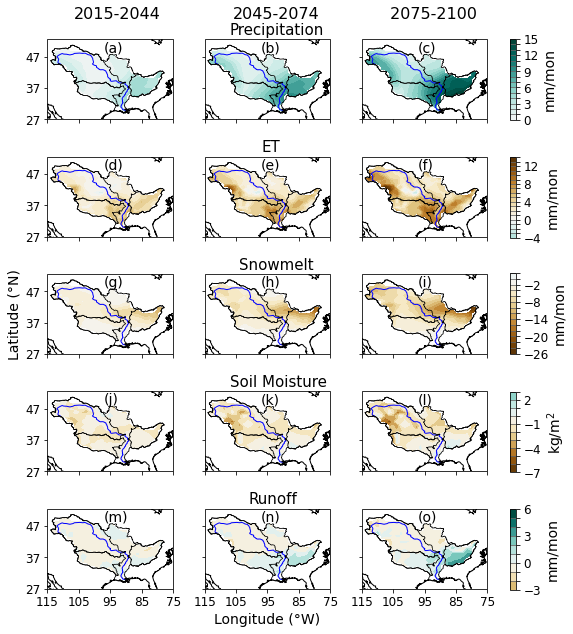

In [79]:

#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

tickFontSize = 12
textFontSize = 14
#legendFontSize = 10
paramFontSize = 15
titleFontSize = 16

cbarTickFontSize = 12
cbarTextFontSize = 14

figTitleDistY = 1.02
linewidth = 0.7
#++++++++++++++++++++

class MidpointNormalize(mpl.colors.Normalize):
    def __init__(self, vmin, vmax, midpoint=0, clip=False):
        self.midpoint = midpoint
        mpl.colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        normalized_min = max(0, 1 / 2 * (1 - abs((self.midpoint - self.vmin) / (self.midpoint - self.vmax))))
        normalized_max = min(1, 1 / 2 * (1 + abs((self.vmax - self.midpoint) / (self.midpoint - self.vmin))))
        normalized_mid = 0.5
        x, y = [self.vmin, self.midpoint, self.vmax], [normalized_min, normalized_mid, normalized_max]
        return np.ma.masked_array(np.interp(value, x, y))



latTickLebelsStr = ['27', '37', '47', ]
lonTickLebelsStr = ['115', '105', '95', '85', '75',]

latTicks = [27, 37, 47]
lonTicks = [-115, -105, -95, -85, -75]

yLimLow = 27
yLimHigh = 52.5

xLimLow = -115
xLimHigh = -75

#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
fig = plt.figure(figsize=(13, 10), constrained_layout=True)
axs = [plt.subplot(5, 3, x + 1, projection = ccrs.PlateCarree()) for x in range(15)]

print(axs)
ax1 = axs[0]

cp1 = ax1.contourf(x_Us, y_Us,param_scenEraOne_diff_masked_Missi,transform=ccrs.PlateCarree(),cmap=cm.BrBG,levels = levels_precip,norm=norm_precip,)

plt.grid(b=True, which='major', color='#666666', linestyle='-')

ax1.add_feature(cfeature.RIVERS.with_scale('110m'), color='b', label='Rivers')     # couche rivières = was 50 m
missi = cfeature.ShapelyFeature(basin_Missi, ccrs.PlateCarree())
arkansas = cfeature.ShapelyFeature(basin_Arkansas, ccrs.PlateCarree())
missouri = cfeature.ShapelyFeature(basin_Missouri, ccrs.PlateCarree())
ohio = cfeature.ShapelyFeature(basin_Ohio, ccrs.PlateCarree())

ax1.add_feature(missi,facecolor='none',edgecolor='black',linewidth=linewidth) # Mississippi
ax1.add_feature(arkansas,facecolor='none',edgecolor='black',linewidth=linewidth) # Arkansas
ax1.add_feature(missouri,facecolor='none',edgecolor='black',linewidth=linewidth) # Missouri
ax1.add_feature(ohio,facecolor='none',edgecolor='black',linewidth=linewidth) # Ohio

ax1.add_feature(cfeature.COASTLINE)
ax1.set_xlim([xLimLow, xLimHigh])
ax1.set_ylim([yLimLow, yLimHigh])

ax1.set_yticks(latTicks)
ax1.set_xticks(lonTicks) 

ax1.set_yticklabels(latTickLebelsStr, fontSize = tickFontSize)
ax1.set_xticklabels('', fontSize = tickFontSize)
ax1.set_title('(a)', x = 0.45, y=figTitleDistY, pad=-14, fontsize = textFontSize, loc='left')
ax1.text(-106.5, 59, r'2015-2044', fontsize=titleFontSize)
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

ax2 = axs[1]
cp2 = ax2.contourf(x_Us, y_Us,param_scenEraTwo_diff_masked_Missi,transform=ccrs.PlateCarree(),cmap=cm.BrBG,levels = levels_precip,norm=norm_precip,)
plt.grid(b=True, which='major', color='#666666', linestyle='-')

p2 = ax2.get_position().get_points().flatten()
cbax2 = fig.add_axes([p2[0]+0.20, +0.770, (p2[2]-p2[0])*0.04, 0.112])

cbar2 =plt.colorbar(cp2, ax=ax2, cax=cbax2, shrink=.5, ticks=boundaries_precip, orientation = 'vertical') 
cbar2.ax.tick_params(labelsize = cbarTickFontSize)  # set your label size here   

for index, label in enumerate(cbar2.ax.yaxis.get_ticklabels()):
    if index % 3 != 0:
        label.set_visible(False)
        
cbar2.set_label("mm/mon", fontsize = cbarTextFontSize)
ax2.add_feature(cfeature.RIVERS.with_scale('110m'), color='b', label='Rivers')     # couche rivières = was 50 m

ax2.add_feature(missi,facecolor='none',edgecolor='black',linewidth=linewidth) # Mississippi
ax2.add_feature(arkansas,facecolor='none',edgecolor='black',linewidth=linewidth) # Arkansas
ax2.add_feature(missouri,facecolor='none',edgecolor='black',linewidth=linewidth) # Missouri
ax2.add_feature(ohio,facecolor='none',edgecolor='black',linewidth=linewidth) # Ohio

ax2.add_feature(cfeature.COASTLINE)
ax2.set_xlim([xLimLow, xLimHigh])
ax2.set_ylim([yLimLow, yLimHigh])

ax2.set_yticks(latTicks)
ax2.set_xticks(lonTicks) 

ax2.set_yticklabels('', fontSize = tickFontSize)
ax2.set_xticklabels('', fontSize = tickFontSize)
ax2.set_title('(b)', x = 0.45, y=figTitleDistY, pad=-14, fontsize = textFontSize, loc='left')
ax2.text(-106, 59, r'2045-2074', fontsize=titleFontSize)
ax2.text(-107, 54, r'Precipitation', fontsize=paramFontSize)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

ax3 = axs[2]
cp3 = ax3.contourf(x_Us, y_Us,param_scenEraThree_diff_masked_Missi,transform=ccrs.PlateCarree(),cmap=cm.BrBG,levels = levels_precip,norm=norm_precip,)

plt.grid(b=True, which='major', color='#666666', linestyle='-')
ax3.add_feature(cfeature.RIVERS.with_scale('110m'), color='b', label='Rivers')     # couche rivières = was 50 m

ax3.add_feature(missi,facecolor='none',edgecolor='black',linewidth=linewidth) # Mississippi
ax3.add_feature(arkansas,facecolor='none',edgecolor='black',linewidth=linewidth) # Arkansas
ax3.add_feature(missouri,facecolor='none',edgecolor='black',linewidth=linewidth) # Missouri
ax3.add_feature(ohio,facecolor='none',edgecolor='black',linewidth=linewidth) # Ohio

ax3.add_feature(cfeature.COASTLINE)
ax3.set_xlim([xLimLow, xLimHigh])
ax3.set_ylim([yLimLow, yLimHigh])

ax3.set_yticks(latTicks)
ax3.set_xticks(lonTicks) 

ax3.set_yticklabels('', fontSize = tickFontSize)
ax3.set_xticklabels('', fontSize = tickFontSize)
ax3.set_title('(c)', x = 0.45, y=figTitleDistY, pad=-14, fontsize = textFontSize, loc='left')
ax3.text(-107.5, 59, r' 2075-2100', fontsize=titleFontSize)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

ax4 = axs[3]
cp4 = ax4.contourf(x_Us, y_Us,et_scenEraOne_diff_masked_Missi,transform=ccrs.PlateCarree(),cmap=cm.BrBG_r,levels = levels_et,norm=norm_et)

plt.grid(b=True, which='major', color='#666666', linestyle='-')

ax4.add_feature(cfeature.RIVERS.with_scale('110m'), color='b', label='Rivers')     # couche rivières = was 50 m
ax4.add_feature(missi,facecolor='none',edgecolor='black',linewidth=linewidth) # Mississippi
ax4.add_feature(arkansas,facecolor='none',edgecolor='black',linewidth=linewidth) # Arkansas
ax4.add_feature(missouri,facecolor='none',edgecolor='black',linewidth=linewidth) # Missouri
ax4.add_feature(ohio,facecolor='none',edgecolor='black',linewidth=linewidth) # Ohio

ax4.add_feature(cfeature.COASTLINE)
ax4.set_xlim([xLimLow, xLimHigh])
ax4.set_ylim([yLimLow, yLimHigh])

ax4.set_yticks(latTicks)
ax4.set_xticks(lonTicks) 

ax4.set_yticklabels(latTickLebelsStr, fontSize = tickFontSize)
ax4.set_xticklabels('', fontSize = tickFontSize)
ax4.set_title('(d)', x = 0.45, y=figTitleDistY, pad=-14, fontsize = textFontSize, loc='left')
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

ax5 = axs[4]
cp5 = ax5.contourf(x_Us, y_Us,et_scenEraTwo_diff_masked_Missi,transform=ccrs.PlateCarree(),cmap=cm.BrBG_r,levels = levels_et,norm=norm_et)
plt.grid(b=True, which='major', color='#666666', linestyle='-')

p5 = ax5.get_position().get_points().flatten()
cbax5 = fig.add_axes([p5[0]+0.20, +0.606, (p5[2]-p5[0])*0.04, 0.112])
cbar5 =plt.colorbar(cp5, ax=ax5, cax=cbax5, shrink=.5, ticks=boundaries_et, orientation = 'vertical') 
cbar5.ax.tick_params(labelsize = cbarTickFontSize)  # set your label size here

for index, label in enumerate(cbar5.ax.yaxis.get_ticklabels()):
    if index % 4 != 0:
        label.set_visible(False)

cbar5.set_label("mm/mon", fontsize = cbarTextFontSize)
ax5.add_feature(cfeature.RIVERS.with_scale('110m'), color='b', label='Rivers')     # couche rivières = was 50 m

ax5.add_feature(missi,facecolor='none',edgecolor='black',linewidth=linewidth) # Mississippi
ax5.add_feature(arkansas,facecolor='none',edgecolor='black',linewidth=linewidth) # Arkansas
ax5.add_feature(missouri,facecolor='none',edgecolor='black',linewidth=linewidth) # Missouri
ax5.add_feature(ohio,facecolor='none',edgecolor='black',linewidth=linewidth) # Ohio

ax5.add_feature(cfeature.COASTLINE)
ax5.set_xlim([xLimLow, xLimHigh])
ax5.set_ylim([yLimLow, yLimHigh])

ax5.set_yticks(latTicks)
ax5.set_xticks(lonTicks) 

ax5.set_yticklabels('', fontSize = tickFontSize)
ax5.set_xticklabels('', fontSize = tickFontSize)
ax5.set_title('(e)', x = 0.45, y=figTitleDistY, pad=-14, fontsize = textFontSize, loc='left')
ax5.text(-97, 54, r'ET', fontsize=paramFontSize)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

ax6 = axs[5]
cp6 = ax6.contourf(x_Us, y_Us,et_scenEraThree_diff_masked_Missi,transform=ccrs.PlateCarree(),cmap=cm.BrBG_r,levels = levels_et,norm=norm_et)

plt.grid(b=True, which='major', color='#666666', linestyle='-')
ax6.add_feature(cfeature.RIVERS.with_scale('110m'), color='b', label='Rivers')     # couche rivières = was 50 m

ax6.add_feature(missi,facecolor='none',edgecolor='black',linewidth=linewidth) # Mississippi
ax6.add_feature(arkansas,facecolor='none',edgecolor='black',linewidth=linewidth) # Arkansas
ax6.add_feature(missouri,facecolor='none',edgecolor='black',linewidth=linewidth) # Missouri
ax6.add_feature(ohio,facecolor='none',edgecolor='black',linewidth=linewidth) # Ohio

ax6.add_feature(cfeature.COASTLINE)
ax6.set_xlim([xLimLow, xLimHigh])
ax6.set_ylim([yLimLow, yLimHigh])

ax6.set_yticks(latTicks)
ax6.set_xticks(lonTicks) 


ax6.set_yticklabels('', fontSize = tickFontSize)
ax6.set_xticklabels('', fontSize = tickFontSize)
ax6.set_title('(f)', x = 0.45, y=figTitleDistY, pad=-14, fontsize = textFontSize, loc='left')
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

ax7 = axs[6]
cp7 = ax7.contourf(x_Us, y_Us,snowMelt_scenEraOne_diff_masked_Missi,transform=ccrs.PlateCarree(),cmap=cm.BrBG,levels = levels_snowMelt,norm=norm_snowMelt,)

plt.grid(b=True, which='major', color='#666666', linestyle='-')

ax7.add_feature(cfeature.RIVERS.with_scale('110m'), color='b', label='Rivers')     # couche rivières = was 50 m
ax7.add_feature(missi,facecolor='none',edgecolor='black',linewidth=linewidth) # Mississippi
ax7.add_feature(arkansas,facecolor='none',edgecolor='black',linewidth=linewidth) # Arkansas
ax7.add_feature(missouri,facecolor='none',edgecolor='black',linewidth=linewidth) # Missouri
ax7.add_feature(ohio,facecolor='none',edgecolor='black',linewidth=linewidth) # Ohio

ax7.add_feature(cfeature.COASTLINE)
ax7.set_xlim([xLimLow, xLimHigh])
ax7.set_ylim([yLimLow, yLimHigh])

ax7.set_yticks(latTicks)
ax7.set_xticks(lonTicks) 

ax7.set_yticklabels(latTickLebelsStr, fontSize = tickFontSize)
ax7.set_xticklabels('', fontSize = tickFontSize)

ax7.set_ylabel('Latitude (°N)', fontsize = textFontSize)
ax7.set_title('(g)', x = 0.45, y=figTitleDistY, pad=-14, fontsize = textFontSize, loc='left')
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

ax8 = axs[7]
cp8 = ax8.contourf(x_Us, y_Us,snowMelt_scenEraTwo_diff_masked_Missi,transform=ccrs.PlateCarree(),cmap=cm.BrBG,levels = levels_snowMelt,norm=norm_snowMelt)

plt.grid(b=True, which='major', color='#666666', linestyle='-')

p8 = ax8.get_position().get_points().flatten()
cbax8 = fig.add_axes([p8[0]+0.20, +0.445, (p8[2]-p8[0])*0.04, 0.112])
cbar8 =plt.colorbar(cp8, ax=ax8, cax=cbax8, shrink=.5, ticks=boundaries_snowMelt, orientation = 'vertical') 
cbar8.ax.tick_params(labelsize = cbarTickFontSize)  # set your label size here

for index, label in enumerate(cbar8.ax.yaxis.get_ticklabels()):
    if index % 3 != 0:
        label.set_visible(False)        

cbar8.set_label("mm/mon", fontsize = cbarTextFontSize)

ax8.add_feature(cfeature.RIVERS.with_scale('110m'), color='b', label='Rivers')     # couche rivières = was 50 m

ax8.add_feature(missi,facecolor='none',edgecolor='black',linewidth=linewidth) # Mississippi
ax8.add_feature(arkansas,facecolor='none',edgecolor='black',linewidth=linewidth) # Arkansas
ax8.add_feature(missouri,facecolor='none',edgecolor='black',linewidth=linewidth) # Missouri
ax8.add_feature(ohio,facecolor='none',edgecolor='black',linewidth=linewidth) # Ohio

ax8.add_feature(cfeature.COASTLINE)
ax8.set_xlim([xLimLow, xLimHigh])
ax8.set_ylim([yLimLow, yLimHigh])

ax8.set_yticks(latTicks)
ax8.set_xticks(lonTicks) 

ax8.set_yticklabels('', fontSize = tickFontSize)
ax8.set_xticklabels('', fontSize = tickFontSize)

ax8.set_title('(h)', x = 0.45, y=figTitleDistY, pad=-14, fontsize = textFontSize, loc='left')
ax8.text(-104, 54, r'Snowmelt', fontsize=paramFontSize)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


ax9 = axs[8]
cp9 = ax9.contourf(x_Us, y_Us,snowMelt_scenEraThree_diff_masked_Missi,transform=ccrs.PlateCarree(),cmap=cm.BrBG,levels = levels_snowMelt,norm=norm_snowMelt)

plt.grid(b=True, which='major', color='#666666', linestyle='-')
ax9.add_feature(cfeature.RIVERS.with_scale('110m'), color='b', label='Rivers')     # couche rivières = was 50 m

ax9.add_feature(missi,facecolor='none',edgecolor='black',linewidth=linewidth) # Mississippi
ax9.add_feature(arkansas,facecolor='none',edgecolor='black',linewidth=linewidth) # Arkansas
ax9.add_feature(missouri,facecolor='none',edgecolor='black',linewidth=linewidth) # Missouri
ax9.add_feature(ohio,facecolor='none',edgecolor='black',linewidth=linewidth) # Ohio

ax9.add_feature(cfeature.COASTLINE)
ax9.set_xlim([xLimLow, xLimHigh])
ax9.set_ylim([yLimLow, yLimHigh])

ax9.set_yticks(latTicks)
ax9.set_xticks(lonTicks) 

ax9.set_yticklabels('', fontSize = tickFontSize)
ax9.set_xticklabels('', fontSize = tickFontSize)
ax9.set_title('(i)', x = 0.45, y=figTitleDistY, pad=-14, fontsize = textFontSize, loc='left')
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


ax10 = axs[9]
cp10 = ax10.contourf(x_Us, y_Us,soilMoist_scenEraOne_diff_masked_Missi,transform=ccrs.PlateCarree(),cmap=cm.BrBG,levels = levels_soilMoist,norm=norm_soilMoist,)

plt.grid(b=True, which='major', color='#666666', linestyle='-')


ax10.add_feature(cfeature.RIVERS.with_scale('110m'), color='b', label='Rivers')     # couche rivières = was 50 m
ax10.add_feature(missi,facecolor='none',edgecolor='black',linewidth=linewidth) # Mississippi
ax10.add_feature(arkansas,facecolor='none',edgecolor='black',linewidth=linewidth) # Arkansas
ax10.add_feature(missouri,facecolor='none',edgecolor='black',linewidth=linewidth) # Missouri
ax10.add_feature(ohio,facecolor='none',edgecolor='black',linewidth=linewidth) # Ohio

ax10.add_feature(cfeature.COASTLINE)

ax10.set_xlim([xLimLow, xLimHigh])
ax10.set_ylim([yLimLow, yLimHigh])

ax10.set_yticks(latTicks)
ax10.set_xticks(lonTicks) 

ax10.set_yticklabels(latTickLebelsStr, fontSize = tickFontSize)
ax10.set_xticklabels('', fontSize = tickFontSize)
ax10.set_title('(j)', x = 0.45, y=figTitleDistY, pad=-14, fontsize = textFontSize, loc='left')
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

ax11 = axs[10]
cp11 = ax11.contourf(x_Us, y_Us,soilMoist_scenEraTwo_diff_masked_Missi,transform=ccrs.PlateCarree(),cmap=cm.BrBG,levels = levels_soilMoist,norm=norm_soilMoist,)

plt.grid(b=True, which='major', color='#666666', linestyle='-')

p11 = ax11.get_position().get_points().flatten()
cbax11 = fig.add_axes([p11[0]+0.20, +0.280, (p11[2]-p11[0])*0.04, 0.112])

cbar11 =plt.colorbar(cp11, ax=ax11, cax=cbax11, shrink=.5, ticks=boundaries_soilMoist, orientation = 'vertical') 

cbar11.ax.tick_params(labelsize = cbarTickFontSize)  # set your label size here

for index, label in enumerate(cbar11.ax.yaxis.get_ticklabels()):
    if index % 3 != 0:
        label.set_visible(False)        
        
    
cbar11.set_label("kg/$\mathregular{m^{2}}$", fontsize = cbarTextFontSize)
ax11.add_feature(cfeature.RIVERS.with_scale('110m'), color='b', label='Rivers')     # couche rivières = was 50 m

ax11.add_feature(missi,facecolor='none',edgecolor='black',linewidth=linewidth) # Mississippi
ax11.add_feature(arkansas,facecolor='none',edgecolor='black',linewidth=linewidth) # Arkansas
ax11.add_feature(missouri,facecolor='none',edgecolor='black',linewidth=linewidth) # Missouri
ax11.add_feature(ohio,facecolor='none',edgecolor='black',linewidth=linewidth) # Ohio

ax11.add_feature(cfeature.COASTLINE)
ax11.set_xlim([xLimLow, xLimHigh])
ax11.set_ylim([yLimLow, yLimHigh])

ax11.set_yticks(latTicks)
ax11.set_xticks(lonTicks) 

ax11.set_yticklabels('', fontSize = tickFontSize)
ax11.set_xticklabels('', fontSize = tickFontSize)
ax11.set_title('(k)', x = 0.45, y=figTitleDistY, pad=-14, fontsize = textFontSize, loc='left')
ax11.text(-107, 54, r'Soil Moisture', fontsize=paramFontSize)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

ax12 = axs[11]
cp12 = ax12.contourf(x_Us, y_Us,soilMoist_scenEraThree_diff_masked_Missi,transform=ccrs.PlateCarree(),cmap=cm.BrBG,levels = levels_soilMoist,norm=norm_soilMoist,)

plt.grid(b=True, which='major', color='#666666', linestyle='-')
ax12.add_feature(cfeature.RIVERS.with_scale('110m'), color='b', label='Rivers')     # couche rivières = was 50 m

ax12.add_feature(missi,facecolor='none',edgecolor='black',linewidth=linewidth) # Mississippi
ax12.add_feature(arkansas,facecolor='none',edgecolor='black',linewidth=linewidth) # Arkansas
ax12.add_feature(missouri,facecolor='none',edgecolor='black',linewidth=linewidth) # Missouri
ax12.add_feature(ohio,facecolor='none',edgecolor='black',linewidth=linewidth) # Ohio

ax12.add_feature(cfeature.COASTLINE)
ax12.set_xlim([xLimLow, xLimHigh])
ax12.set_ylim([yLimLow, yLimHigh])

ax12.set_yticks(latTicks)
ax12.set_xticks(lonTicks) 

ax12.set_yticklabels('', fontSize = tickFontSize)
ax12.set_xticklabels('', fontSize = tickFontSize)
ax12.set_title('(l)', x = 0.45, y=figTitleDistY, pad=-14, fontsize = textFontSize, loc='left')
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

ax13 = axs[12]
cp13 = ax13.contourf(x_Us, y_Us,runoff_scenEraOne_diff_masked_Missi,transform=ccrs.PlateCarree(),cmap=cm.BrBG,levels = levels_runoff,norm=norm_runoff,)

plt.grid(b=True, which='major', color='#666666', linestyle='-')


ax13.add_feature(cfeature.RIVERS.with_scale('110m'), color='b', label='Rivers')     # couche rivières = was 50 m
ax13.add_feature(missi,facecolor='none',edgecolor='black',linewidth=linewidth) # Mississippi
ax13.add_feature(arkansas,facecolor='none',edgecolor='black',linewidth=linewidth) # Arkansas
ax13.add_feature(missouri,facecolor='none',edgecolor='black',linewidth=linewidth) # Missouri
ax13.add_feature(ohio,facecolor='none',edgecolor='black',linewidth=linewidth) # Ohio

ax13.add_feature(cfeature.COASTLINE)
ax13.set_xlim([xLimLow, xLimHigh])
ax13.set_ylim([yLimLow, yLimHigh])

ax13.set_yticks(latTicks)
ax13.set_xticks(lonTicks) 

ax13.set_yticklabels(latTickLebelsStr, fontSize = tickFontSize)
ax13.set_xticklabels(lonTickLebelsStr, fontSize = tickFontSize)
ax13.set_title('(m)', x = 0.45, y=figTitleDistY, pad=-14, fontsize = textFontSize, loc='left')
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

ax14 = axs[13]
cp14 = ax14.contourf(x_Us, y_Us,runoff_scenEraTwo_diff_masked_Missi,transform=ccrs.PlateCarree(),cmap=cm.BrBG,levels = levels_runoff,norm=norm_runoff)

plt.grid(b=True, which='major', color='#666666', linestyle='-')

p14 = ax14.get_position().get_points().flatten()
cbax14 = fig.add_axes([p14[0]+0.20, +0.117, (p14[2]-p14[0])*0.04, 0.112])

cbar14 =plt.colorbar(cp14, ax=ax14, cax=cbax14, shrink=.5, ticks=boundaries_runoff, orientation = 'vertical') 
cbar14.ax.tick_params(labelsize = cbarTickFontSize)  # set your label size here

for index, label in enumerate(cbar14.ax.yaxis.get_ticklabels()):
    if index % 3 != 0:
        label.set_visible(False)        
        
    
cbar14.set_label("mm/mon", fontsize = cbarTextFontSize)

ax14.add_feature(cfeature.RIVERS.with_scale('110m'), color='b', label='Rivers')     # couche rivières = was 50 m

ax14.add_feature(missi,facecolor='none',edgecolor='black',linewidth=linewidth) # Mississippi
ax14.add_feature(arkansas,facecolor='none',edgecolor='black',linewidth=linewidth) # Arkansas
ax14.add_feature(missouri,facecolor='none',edgecolor='black',linewidth=linewidth) # Missouri
ax14.add_feature(ohio,facecolor='none',edgecolor='black',linewidth=linewidth) # Ohio

ax14.add_feature(cfeature.COASTLINE)
ax14.set_xlim([xLimLow, xLimHigh])
ax14.set_ylim([yLimLow, yLimHigh])

ax14.set_yticks(latTicks)
ax14.set_xticks(lonTicks) 

ax14.set_yticklabels('', fontSize = tickFontSize)
ax14.set_xticklabels(lonTickLebelsStr, fontSize = tickFontSize)
ax14.set_xlabel('Longitude (°W)', fontsize = textFontSize)
ax14.set_title('(n)', x = 0.45, y=figTitleDistY, pad=-14, fontsize = textFontSize, loc='left')
ax14.text(-101, 54, r'Runoff', fontsize=paramFontSize)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

ax15 = axs[14]
cp15 = ax15.contourf(x_Us, y_Us,runoff_scenEraThree_diff_masked_Missi,transform=ccrs.PlateCarree(),cmap=cm.BrBG,levels = levels_runoff,norm=norm_runoff)

plt.grid(b=True, which='major', color='#666666', linestyle='-')

ax15.add_feature(cfeature.RIVERS.with_scale('110m'), color='b', label='Rivers')     # couche rivières = was 50 m

ax15.add_feature(missi,facecolor='none',edgecolor='black',linewidth=linewidth) # Mississippi
ax15.add_feature(arkansas,facecolor='none',edgecolor='black',linewidth=linewidth) # Arkansas
ax15.add_feature(missouri,facecolor='none',edgecolor='black',linewidth=linewidth) # Missouri
ax15.add_feature(ohio,facecolor='none',edgecolor='black',linewidth=linewidth) # Ohio

ax15.add_feature(cfeature.COASTLINE)
ax15.set_xlim([xLimLow, xLimHigh])
ax15.set_ylim([yLimLow, yLimHigh])

ax15.set_yticks(latTicks)
ax15.set_xticks(lonTicks) 

ax15.set_yticklabels('', fontSize = tickFontSize)
ax15.set_xticklabels(lonTickLebelsStr, fontSize = tickFontSize)
ax15.set_title('(o)', x = 0.45, y=figTitleDistY, pad=-14, fontsize = textFontSize, loc='left')
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

plt.subplots_adjust(left=0.13,
                    bottom=0.1,
                    right=0.6,
                    top=0.9,
                    wspace=0.25,
                    hspace=0.1
                    )

import warnings

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=DeprecationWarning)

    
#plt.savefig(r'C:\rezaul\1.academic\1.research\2.project\mrb\output\fig\paperOne\param\gr\anomSpatial\tcfParamMap.pdf') 
#plt.savefig(r'C:\rezaul\1.academic\1.research\2.project\mrb\output\fig\paperOne\param\gr\anomSpatial\tcfParamMap.png', dpi=600)  


plt.show()


In [80]:
STOP here ==============

SyntaxError: invalid syntax (<ipython-input-80-9c5471e7b37b>, line 1)